### Data Wrangling

In [29]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [30]:
data = pd.read_csv('C:/Users/Julia/Documents/_DATA SCIENCE/_Capstones/Capstone 2/healthcare-dataset-stroke-data.csv')

In [31]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Dealing with outliers and irrelevant data

### First I want to check if there are duplicate values in the id column to be sure that the information for the same patient isn't repeated twice.

In [32]:
is_duplicate = data['id'].duplicated().any()
is_duplicate

False

### There are no duplicate id
### I think we can drop 'id' column as it doesn't provide any useful information.

In [33]:
data = data.drop('id', 1)

C:\Users\Julia\AppData\Local\Temp/ipykernel_26264/1676501675.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('id', 1)


In [34]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


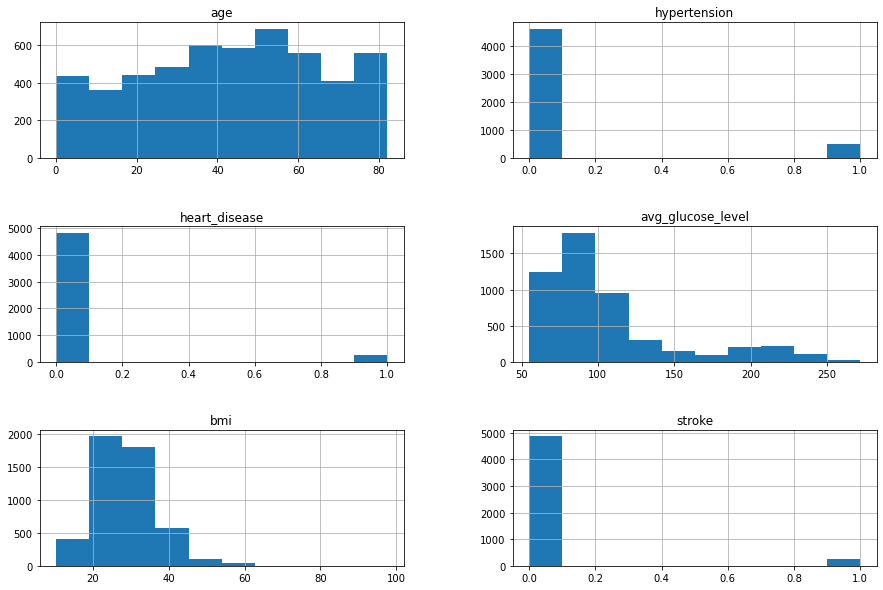

In [35]:
data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

### There are very low 'age' values, as well as very low 'bmi' values, suggesting that there are data for children included in this dataset. 

In [36]:
unique_val = data['work_type'].unique()
unique_val

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

### There is a 'children' category in a 'work_type' column.
### Next I'm going to check which age values correspond to 'children' value to make sure that data is in fact on children. 

In [37]:
ages_of_children = data.loc[data['work_type'] == 'children','age']
ages_of_children.describe()

count    687.000000
mean       6.841339
std        4.533364
min        0.080000
25%        2.000000
50%        6.000000
75%       11.000000
max       16.000000
Name: age, dtype: float64

### Age range for 'children' category is 0.08-16
### Even though it is possible for a child to have a stroke, but it is very rare and normally caused by completely different reasons than those being studied in this project. Therefore I think it is appropriate to drop rows that contain data on children patients. 

In [38]:
data_adult = data[data.work_type != 'children']

In [39]:
data_adult['age'].describe().T

count    4423.000000
mean       48.878137
std        18.707171
min         7.000000
25%        34.000000
50%        49.000000
75%        63.000000
max        82.000000
Name: age, dtype: float64

### Even though I dropped 'children' category, data above show that there are still low 'age' values, therefore I will use maximum age for 'children' category (16) as a threshold and will drop all rows with ages 16 and below

In [40]:
data_adult = data_adult[data_adult.age > 16]

In [41]:
data_adult.describe().T
data_adult[data_adult.bmi > 60]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
270,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
358,Male,52.0,0,0,Yes,Self-employed,Urban,78.40,64.8,never smoked,0
466,Female,61.0,1,0,Yes,Private,Rural,170.05,60.2,smokes,0
544,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
928,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0
1559,Female,53.0,0,0,Yes,Private,Rural,72.63,66.8,Unknown,0
2128,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
2764,Female,24.0,0,0,Yes,Private,Urban,85.55,63.3,never smoked,0
2840,Female,52.0,0,0,Yes,Private,Urban,98.27,61.2,Unknown,0
3825,Female,52.0,0,0,Yes,Private,Rural,118.46,61.6,smokes,0


In [42]:
data_adult.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4314.0,49.740380,18.126633,17.00,35.0000,50.000,64.0000,82.00
hypertension,4314.0,0.115438,0.319587,0.00,0.0000,0.000,0.0000,1.00
heart_disease,4314.0,0.063746,0.244328,0.00,0.0000,0.000,0.0000,1.00
avg_glucose_level,4314.0,108.234525,47.565538,55.12,77.4525,92.295,115.9275,271.74
bmi,4131.0,30.419777,7.323433,11.30,25.4000,29.200,34.1000,97.60
stroke,4314.0,0.057255,0.232357,0.00,0.0000,0.000,0.0000,1.00


In [43]:
data_adult

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [44]:
data_adult.reset_index(drop=True,inplace=True)

In [47]:
data_adult.to_csv(r'C:/Users/Julia/Documents/_DATA SCIENCE/_Capstones/Capstone 2/Data_adult.csv', index=True,header=True)

# Next steps:
## 1. Encoding categorical values
## 2. Imputing missing values

In [16]:
print("avg_glucose_level")
upper_fence_glucose = data_adult["avg_glucose_level"].mean() + 3*data_adult["avg_glucose_level"].std()
lower_fence_glucose = data_adult["avg_glucose_level"].mean() - 3*data_adult["avg_glucose_level"].std()
print("Highest allowed",upper_fence_glucose)
print("Lowest allowed", lower_fence_glucose)
outliers_glucose = data_adult[(data_adult["avg_glucose_level"] > upper_fence_glucose) | (data_adult["avg_glucose_level"] < lower_fence_glucose)]
print(outliers_glucose.shape[0])

print("bmi")
upper_fence_bmi = data_adult["bmi"].mean() + 3*data_adult["bmi"].std()
lower_fence_bmi = data_adult["bmi"].mean() - 3*data_adult["bmi"].std()
print("Highest allowed: ", upper_fence_bmi)
print("Lowest allowed: ", lower_fence_bmi)
outliers_bmi = data_adult[(data_adult["bmi"] > upper_fence_bmi) | (data_adult["bmi"] < lower_fence_bmi)]
print(outliers_bmi.shape[0])

avg_glucose_level
Highest allowed 250.93113847921285
Lowest allowed -34.46208887327947
22
bmi
Highest allowed:  52.390076460042195
Lowest allowed:  8.449478127224825
58


In [17]:
Q3 = np.quantile(data_adult['avg_glucose_level'], 0.75)
Q1 = np.quantile(data_adult['avg_glucose_level'], 0.25)
IQR = Q3 - Q1
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR

In [18]:
print(Q3,Q1,IQR,lower_range,upper_range)

115.92750000000001 77.4525 38.47500000000001 19.739999999999988 173.64000000000001


In [19]:
data_adult['avg_glucose_level'].dtype

dtype('float64')

In [20]:
Q3_bmi = np.quantile(data_adult['bmi'], 0.75)
Q1_bmi = np.quantile(data_adult['bmi'], 0.25)
IQR_bmi = Q3_bmi - Q1_bmi
lower_range_bmi = Q1_bmi - 1.5 * IQR_bmi
upper_range_bmi = Q3_bmi + 1.5 * IQR_bmi

In [21]:
print(Q3_bmi,Q1_bmi,IQR_bmi,lower_range_bmi,upper_range_bmi)

nan nan nan nan nan


In [22]:
categor_var = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
for i in categor_var:
    print("\nFeature: %s \n" % (i))
    print(data_adult[i].value_counts())


Feature: gender 

Female    2613
Male      1700
Other        1
Name: gender, dtype: int64

Feature: ever_married 

Yes    3353
No      961
Name: ever_married, dtype: int64

Feature: work_type 

Private          2840
Self-employed     810
Govt_job          654
Never_worked       10
Name: work_type, dtype: int64

Feature: Residence_type 

Urban    2197
Rural    2117
Name: Residence_type, dtype: int64

Feature: smoking_status 

never smoked       1779
Unknown             887
formerly smoked     864
smokes              784
Name: smoking_status, dtype: int64


### There is an outlier in gender column with value 'other' which can be dropped.

In [23]:
data_adult = data_adult[data_adult.gender != 'Other']

In [24]:
data_adult.isna().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool